In [1]:
# Imports and data
import numpy as np
import matplotlib.pyplot as plt

points = np.array([
    [0.10, 0.60],  # P1
    [0.15, 0.71],  # P2
    [0.08, 0.90],  # P3
    [0.16, 0.85],  # P4
    [0.20, 0.30],  # P5
    [0.25, 0.50],  # P6
    [0.24, 0.10],  # P7
    [0.30, 0.20],  # P8
])
labels = ['P1','P2','P3','P4','P5','P6','P7','P8']

In [2]:
# Initial centroids
m1 = points[0].copy()   # P1
m2 = points[7].copy()   # P8

def assign_clusters(pts, c1, c2):
    d1 = np.linalg.norm(pts - c1, axis=1)
    d2 = np.linalg.norm(pts - c2, axis=1)
    return (d2 < d1).astype(int)  # 0 => cluster around m1, 1 => cluster around m2

def recompute_centroids(pts, assignments):
    centroids = []
    for k in [0,1]:
        members = pts[assignments == k]
        if len(members) == 0:
            centroids.append(None)
        else:
            centroids.append(members.mean(axis=0))
    return centroids

In [3]:
# Run one iteration and show results (for the assignment step)
assign1 = assign_clusters(points, m1, m2)
members_m1 = [labels[i] for i in range(len(points)) if assign1[i] == 0]
members_m2 = [labels[i] for i in range(len(points)) if assign1[i] == 1]

print("=== After 1st assignment (initial centroids m1=P1, m2=P8) ===")
print("Members around m1 (cluster 0):", members_m1)
print("Members around m2 (cluster 1):", members_m2)

centroids_after1 = recompute_centroids(points, assign1)
print("\nCentroids after 1st update:")
print("m1_new =", np.round(centroids_after1[0], 6))
print("m2_new =", np.round(centroids_after1[1], 6))

=== After 1st assignment (initial centroids m1=P1, m2=P8) ===
Members around m1 (cluster 0): ['P1', 'P2', 'P3', 'P4', 'P6']
Members around m2 (cluster 1): ['P5', 'P7', 'P8']

Centroids after 1st update:
m1_new = [0.148 0.712]
m2_new = [0.246667 0.2     ]


In [4]:
# Full K-means until convergence
m1_full = m1.copy()
m2_full = m2.copy()
max_iter = 100
tol = 1e-6

for it in range(max_iter):
    assignments = assign_clusters(points, m1_full, m2_full)
    new_centroids = recompute_centroids(points, assignments)

    if new_centroids[0] is None:
        new_centroids[0] = m1_full
    if new_centroids[1] is None:
        new_centroids[1] = m2_full

    shift = np.linalg.norm(new_centroids[0] - m1_full) + np.linalg.norm(new_centroids[1] - m2_full)
    m1_full, m2_full = new_centroids[0], new_centroids[1]

    if shift < tol:
        print(f"\nConverged after {it+1} iterations.")
        break
else:
    print("\nStopped after max iterations.")



Converged after 2 iterations.


In [5]:
# Final clusters and centroids
final_assignments = assignments
final_members_m1 = [labels[i] for i in range(len(points)) if final_assignments[i] == 0]
final_members_m2 = [labels[i] for i in range(len(points)) if final_assignments[i] == 1]

print("\n=== Final clustering ===")
print("Cluster around m1 (final):", final_members_m1)
print("Cluster around m2 (final):", final_members_m2)
print("Final m1 =", np.round(m1_full, 6))
print("Final m2 =", np.round(m2_full, 6))



=== Final clustering ===
Cluster around m1 (final): ['P1', 'P2', 'P3', 'P4', 'P6']
Cluster around m2 (final): ['P5', 'P7', 'P8']
Final m1 = [0.148 0.712]
Final m2 = [0.246667 0.2     ]


In [6]:
# Direct answers from final clustering
index_P6 = labels.index('P6')
cluster_P6 = final_assignments[index_P6]
cluster_name = 'm1' if cluster_P6 == 0 else 'm2'
population_m2 = np.sum(final_assignments == 1)

print("\n=== Requested Answers ===")
print(f"1) P6 belongs to cluster: {cluster_name}")
print(f"2) Population of cluster around m2: {population_m2}")
print(f"3) Updated centroids:\n   m1 = {m1_full}\n   m2 = {m2_full}")



=== Requested Answers ===
1) P6 belongs to cluster: m1
2) Population of cluster around m2: 3
3) Updated centroids:
   m1 = [0.148 0.712]
   m2 = [0.24666667 0.2       ]


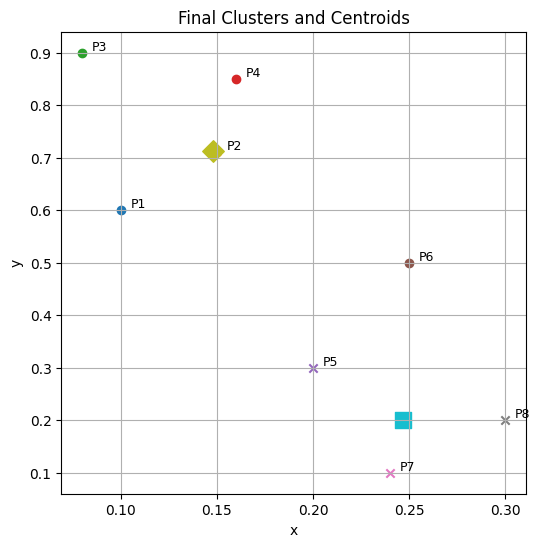

In [7]:
# Scatter Plot
fig, ax = plt.subplots(figsize=(6,6))

for i, p in enumerate(points):
    if final_assignments[i] == 0:
        ax.scatter(p[0], p[1])
    else:
        ax.scatter(p[0], p[1], marker='x')

    ax.text(p[0]+0.005, p[1]+0.005, labels[i], fontsize=9)

ax.scatter(m1_full[0], m1_full[1], s=120, marker='D')
ax.scatter(m2_full[0], m2_full[1], s=120, marker='s')

ax.set_title("Final Clusters and Centroids")
ax.set_xlabel("x")
ax.set_ylabel("y")
plt.grid(True)
plt.show()
